In [10]:
import math
import numpy as np
import matplotlib.pyplot as plt
from numba import cuda

In [11]:
cuda.gpus[0].name

b'GeForce GTX 970'

In [12]:
@cuda.jit
def mandelbrot_numba(m, iterations):
    # Matrix index.
    i, j = cuda.grid(2)
    size = m.shape[0]
    # Skip threads outside the matrix.
    if i >= size or j >= size:
        return
    # Run the simulation.
    c = (-2 + 3. / size * j +
         1j * (1.5 - 3. / size * i))
    z = 0
    for n in range(iterations):
        if abs(z) <= 10:
            z = z * z + c
            m[i, j] = n
        else:
            break

In [13]:
size = 400
iterations = 100
m = np.zeros((size, size))

In [14]:
# 16x16 threads per block.
bs = 16
# Number of blocks in the grid.
bpg = math.ceil(size / bs)
# We prepare the GPU function.
f = mandelbrot_numba[(bpg, bpg), (bs, bs)]

In [15]:
f(m, iterations)

TypeError: not enough arguments for format string

/home/leo/Conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log
  
/home/leo/Conda/lib/python3.7/site-packages/matplotlib/image.py:446: UserWarning: Warning: converting a masked element to nan.
  dv = np.float64(self.norm.vmax) - np.float64(self.norm.vmin)
/home/leo/Conda/lib/python3.7/site-packages/matplotlib/image.py:453: UserWarning: Warning: converting a masked element to nan.
  a_min = np.float64(newmin)
/home/leo/Conda/lib/python3.7/site-packages/matplotlib/image.py:458: UserWarning: Warning: converting a masked element to nan.
  a_max = np.float64(newmax)
/home/leo/Conda/lib/python3.7/site-packages/matplotlib/image.py:478: UserWarning: Warning: converting a masked element to nan.
  dtype=scaled_dtype)


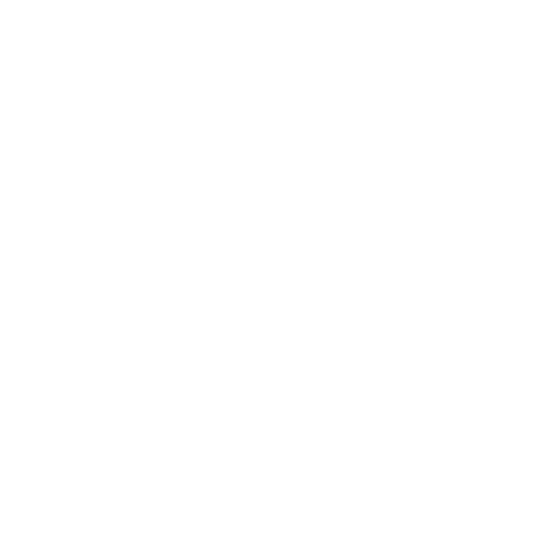

In [9]:
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
ax.imshow(np.log(m), cmap=plt.cm.hot)
ax.set_axis_off()